<a href="https://colab.research.google.com/github/Kraljevic1111/ML-Project-Products-review-analysis/blob/main/Notebook/Products_review_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [127]:
import pandas as pd

# load dataset from GitHub
url = "https://raw.githubusercontent.com/Kraljevic1111/ML-Project-Products-review-analysis/main/data/products.csv"
df = pd.read_csv(url)
print("First 10 rows")
print(df.head(10))
print("Print number of rows:",len(df))
print("Number of rows,columns:")
print(df.shape)
print("Information about dataset")
print(df.info())

First 10 rows
   product ID                                      Product Title  Merchant ID  \
0           1                    apple iphone 8 plus 64gb silver            1   
1           2                apple iphone 8 plus 64 gb spacegrau            2   
2           3  apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...            3   
3           4                apple iphone 8 plus 64gb space grey            4   
4           5  apple iphone 8 plus gold 5.5 64gb 4g unlocked ...            5   
5           6  apple iphone 8 plus gold 5.5 64gb 4g unlocked ...            6   
6           7               apple iphone 8 plus 64 gb space grey            7   
7           8                apple iphone 8 plus 64gb space grey            8   
8           9                apple iphone 8 plus 64gb space grey            9   
9          10                apple iphone 8 plus 64gb space grey           10   

   Category Label _Product Code  Number_of_Views  Merchant Rating  \
0   Mobile Phones    QA-2

## Checking for missing values

In [128]:
print("Missing values per column:")
Missing_values = df.isna().sum()
print(Missing_values)

Missing values per column:
product ID           0
Product Title      172
Merchant ID          0
 Category Label     44
_Product Code       95
Number_of_Views     14
Merchant Rating    170
 Listing Date       59
dtype: int64


## Showing mising values via chart

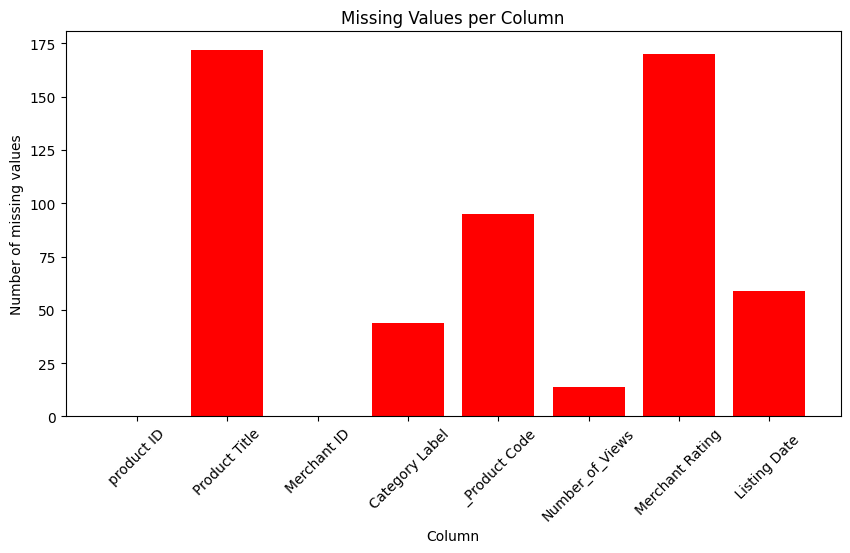

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,5))
plt.bar(Missing_values.index,Missing_values.values,color = 'red')
plt.title("Missing Values per Column")
plt.xlabel("Column")
plt.ylabel("Number of missing values")
plt.xticks(rotation = 45)
plt.show()


## Analizing columns Merchant Rating and Number of View to see if there is any correlation beetwen them.

/tmp/ipython-input-721485788.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df,x = "Merchant Rating",y = "Number_of_Views",palette = "pastel")


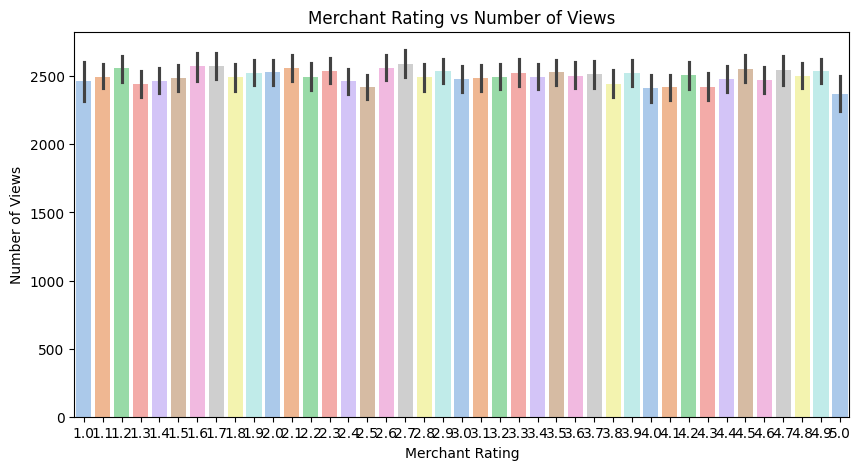

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.barplot(data = df,x = "Merchant Rating",y = "Number_of_Views",palette = "pastel")
plt.title("Merchant Rating vs Number of Views")
plt.xlabel("Merchant Rating")
plt.ylabel("Number of Views")
plt.show()


## After our analysis wee decided taht columns are not in any correlation.Rating is not associeted with view in any way.

## Analyzing column category_label to see if there is any missing values


In [131]:
#checking for missing values
print("Category Label type :",df[' Category Label'].dtype)
print(df[' Category Label'].isna().sum())




Category Label type : object
44


## Analyzing column Product Title

In [132]:
print("Show first 10 rows:")
print(df['Product Title'].head(10))

print("Cheking for missing values:")
print(df['Product Title'].isna().sum())

print("Column type")
print(df['Product Title'].dtype)

Show first 10 rows:
0                      apple iphone 8 plus 64gb silver
1                  apple iphone 8 plus 64 gb spacegrau
2    apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...
3                  apple iphone 8 plus 64gb space grey
4    apple iphone 8 plus gold 5.5 64gb 4g unlocked ...
5    apple iphone 8 plus gold 5.5 64gb 4g unlocked ...
6                 apple iphone 8 plus 64 gb space grey
7                  apple iphone 8 plus 64gb space grey
8                  apple iphone 8 plus 64gb space grey
9                  apple iphone 8 plus 64gb space grey
Name: Product Title, dtype: object
Cheking for missing values:
172
Column type
object


## Standartization of columns Product Title and Category Label

In [133]:
#converting column Product Title to string,converting text to lower cases and striping empty spaces in the beggining and end
df['Product Title'] = df['Product Title'].astype(str).str.lower().str.strip()
#converting column Category Label to string and converting text to lowr cases
df[' Category Label'] = df[' Category Label'].astype(str).str.lower()

print(df['Product Title'].dtype)

object


## Removing missing values:
 Removing missing values from columns

In [134]:
df = df.dropna()#removing missing valuers from all columns
print(df.isna().sum())

product ID         0
Product Title      0
Merchant ID        0
 Category Label    0
_Product Code      0
Number_of_Views    0
Merchant Rating    0
 Listing Date      0
dtype: int64


## Removing columns that are not useful for our analysis

In [135]:
#removing columns
df = df.drop(columns=['product ID', 'Merchant ID', '_Product Code', 'Number_of_Views', 'Merchant Rating', ' Listing Date  '])


## Spliting the data on train and test data
Wee are gona split data to use it to train the model and to see which model for learning is the best in this case

In [136]:
from sklearn.model_selection import train_test_split
x = df['Product Title']
y = df[' Category Label']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42,stratify = y)



## Transforming data in numerical type for analyzis
Wee are gona transform data using tfidfvectorizer to use numerical values in training the model.

In [137]:
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

preprocesor = ColumnTransformer(
    transformers = [
        ("title",TfidfVectorizer,"Product Title"),
        ("Label",TfidfVectorizer," Category Label")
    ]
)

## Creating a list of models to use
Wee are gona create list of models to use in train data to se which have best result

In [139]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

models = {
    "Logistic Regression":LogisticRegression(max_iter = 1000),
    "Naive Bayes":MultinomialNB(),
    "Random Forest":RandomForestClassifier(),
    "Suport Vector Machine":LinearSVC()
}
#creating a loop for going trough the models
for name,model in models.items():
   print(f"{name}:")
   pipeline= Pipeline([("preprocesing",preprocesor),
                    ("Classifier",model)])
#training the models
   pipeline.fit(x_train,y_train)


#prediction
   y_pred = pipeline.predict(x_test)

   print(classification_report(y_test,y_pred))


Logistic Regression:


IndexError: tuple index out of range